## Part 1: PCA and Variance Threshold in a Linear Regression

##### Import the housing data as a data frame and ensure that the data is loaded properly.

In [7]:
import pandas as pd

In [37]:
df = pd.read_csv("train.csv")

In [38]:
df.shape

(1460, 81)

##### Drop the "Id" column and any features that are missing more than 40% of their values.

In [39]:
limitPer = len(df) * .40
newdf = df.dropna(thresh=limitPer, axis=1).drop('Id',axis=1)

In [40]:
newdf.shape

(1460, 76)

##### For numerical columns, fill in any missing data with the median value.

In [41]:
newdf.fillna(newdf.select_dtypes(include='number').mean().iloc[0], inplace=True)

###### For categorical columns, fill in any missing data with the most common value (mode).

In [42]:
newdf.fillna(newdf.select_dtypes(include='object').mode().iloc[0], inplace=True)

##### Convert the categorical columns to dummy variables.

In [84]:
newdf.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [85]:
finaldf = pd.get_dummies(newdf, columns=newdf.select_dtypes(include=['object']).columns.tolist(),drop_first=True)

##### Split the data into a training and test set, where the SalePrice column is the target.

In [86]:
x_data = finaldf.drop(['SalePrice'],axis=1)
y_data = finaldf['SalePrice']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)

##### Run a linear regression and report the R2-value and RMSE on the test set.

In [88]:
from sklearn import linear_model
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [91]:
# Calculate the predicted value for training and test dataset
#
y_train_pred = linear_regression_model.predict(x_train)
y_test_pred = linear_regression_model.predict(x_test)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))


R^2 train: 0.934, test: 0.668


In [94]:
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test)))

MSE train: 406607565.797, test: 2227948473.954


##### Fit and transform the training features with a PCA so that 90% of the variance is retained 
##### (see section 9.1 in the Machine Learning with Python Cookbook).

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [107]:
features = StandardScaler().fit_transform(x_train)

In [108]:
pca = PCA(n_components=0.9,whiten=True)

In [109]:
feature_pcs = pcs.fit_transform(features)

In [110]:
print("original features shape:",features.shape[1])
print("reduced features shape:",feature_pcs.shape[1])

original features shape: 248
reduced features shape: 133


##### How many features are in the PCA-transformed matrix?


In [111]:
print("reduced features shape:",feature_pcs.shape[1])

reduced features shape: 133


##### Transform but DO NOT fit the test features with the same PCA.

In [114]:
features_test = StandardScaler().fit_transform(x_test)
pca = PCA(n_components=0.9,whiten=True)
feature_pca = pca.fit_transform(features_test)

##### Repeat step 7 with your PCA transformed data.

##### Take your original training features (from step 6) and apply a min-max scaler to them.

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
min_max_scaler = MinMaxScaler()

In [119]:
min_max_scaler.fit_transform(x_data,y_data)

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 1.        ,
        0.        ]])

##### Find the min-max scaled features in your training set that have a variance above 0.1 

In [121]:
from sklearn.feature_selection import VarianceThreshold

In [122]:
thresholder = VarianceThreshold(threshold=.1)

In [123]:
features_high_variance = thresholder.fit_transform(x_train)

###### Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

## Part 2: Categorical Feature Selection

##### 1.Import the data as a data frame and ensure it is loaded correctly.

In [8]:
df = pd.read_csv("mushrooms.csv")

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### 2.Convert the categorical features (all of them) to dummy variables.

In [10]:
finaldf = pd.get_dummies(df, columns=df.columns.tolist(),drop_first=True)

In [11]:
finaldf.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


##### 3.Split the data into a training and test set.

In [12]:
from sklearn.model_selection import train_test_split
x_data = finaldf.drop(['class_p'],axis=1)
y_data = finaldf['class_p']

x_train, x_test,y_train,y_test= train_test_split(x_data,y_data,test_size = 0.2, shuffle=False)

##### 4.Fit a decision tree classifier on the training set.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [14]:
clf = DecisionTreeClassifier(random_state=0)

In [15]:
clf = clf.fit(x_train,y_train)

In [16]:
y_pred = clf.predict(x_test)

##### 5.Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9901538461538462


In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
confusion_matrix(y_test, y_pred)

array([[ 491,   16],
       [   0, 1118]])

##### 6.Create a visualization of the decision tree.

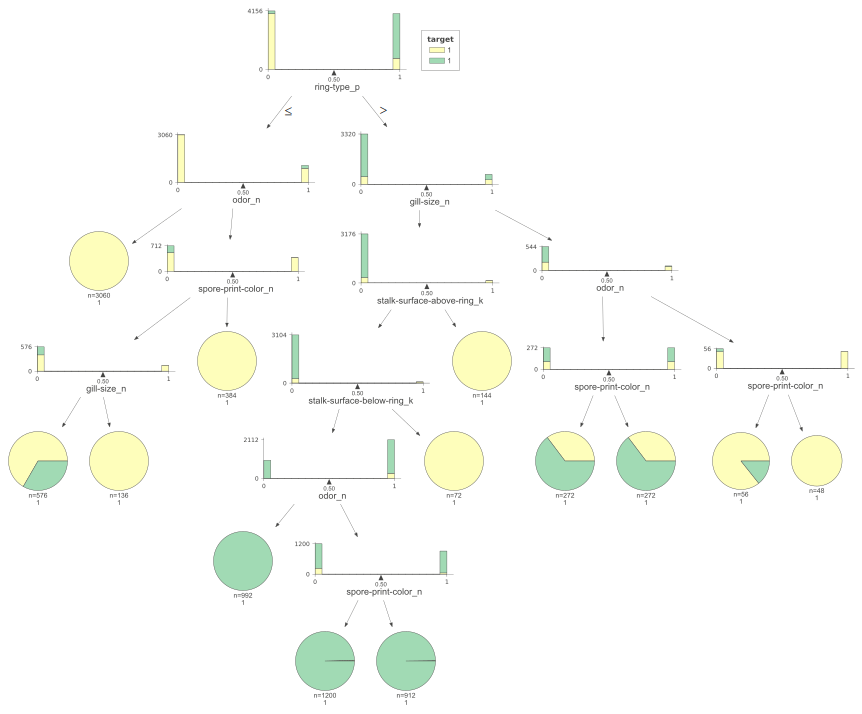

In [52]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, x_data, y_data,
                target_name="target",
                feature_names=x_data.columns,
                class_names=list(X_new['bruises_t']))

viz

##### 7.Use a χ2-statistic selector to pick the five best features for this data 
(see section 10.4 of the Machine Learning with Python Cookbook).

In [35]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [36]:
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(x_data, y_data)
fit.scores_

array([4.29826353e+00, 1.70642835e+00, 1.95193796e+02, 2.97794677e+01,
       3.22966436e+00, 4.29826353e+00, 5.07331581e+01, 3.83744391e+01,
       7.72001030e+00, 6.24697548e+01, 1.35617524e+01, 1.14919473e+01,
       9.60990302e+00, 1.48897338e+01, 1.48897338e+01, 1.26598964e+02,
       9.00691216e+01, 1.19427735e+03, 2.06316650e+02, 2.32106231e+03,
       3.72243346e+02, 3.86843718e+01, 2.83618795e+03, 2.75088866e+02,
       6.18949949e+02, 6.18949949e+02, 3.50544682e+00, 8.26795274e+02,
       1.63660683e+03, 8.93384030e+01, 1.06660990e+02, 1.67863351e+02,
       1.72779150e+02, 5.90761088e+02, 5.95589354e+01, 1.68327885e+01,
       2.57895812e+01, 2.91276850e+02, 3.70376802e+02, 1.76262994e+01,
       3.65941055e+01, 1.36399901e+00, 3.61470789e+02, 2.88169796e+02,
       1.78676806e+02, 1.98640849e+03, 7.11616612e+02, 2.12533158e+00,
       1.91437139e+03, 5.77036404e+02, 5.22976509e+01, 3.86843718e+01,
       8.93384030e+01, 5.36030418e+02, 4.17308079e+02, 1.78676806e+02,
      

In [37]:
X_new=test.fit_transform(x_data, y_data)

In [38]:
X_new

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0]], dtype=uint8)

###### 8.Which five features were selected in step 7? Hint: Use the get_support function.

In [39]:
from sklearn.feature_selection import SelectKBest, chi2

KBest = SelectKBest(chi2, k=10).fit(x_data, y_data) 

In [40]:
f = KBest.get_support(1) #the most important features

In [42]:
X_new = x_data[x_data.columns[f]] # final features`

In [43]:
X_new

,bruises_t,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_n
0,1,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,0,1,0,0
8120,0,0,1,0,0,0,0,1,0,0
8121,0,0,1,0,0,0,0,1,0,0
8122,0,0,0,1,0,1,0,0,0,0


###### 9.Repeat steps 4 and 5 with the five best features selected in step 7.


In [44]:
x_data = X_new.drop(['bruises_t'],axis=1)
y_data = X_new['bruises_t']

x_train, x_test,y_train,y_test= train_test_split(x_data,y_data,test_size = 0.2, shuffle=False)
clf = DecisionTreeClassifier(random_state=0)

In [45]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8313846153846154


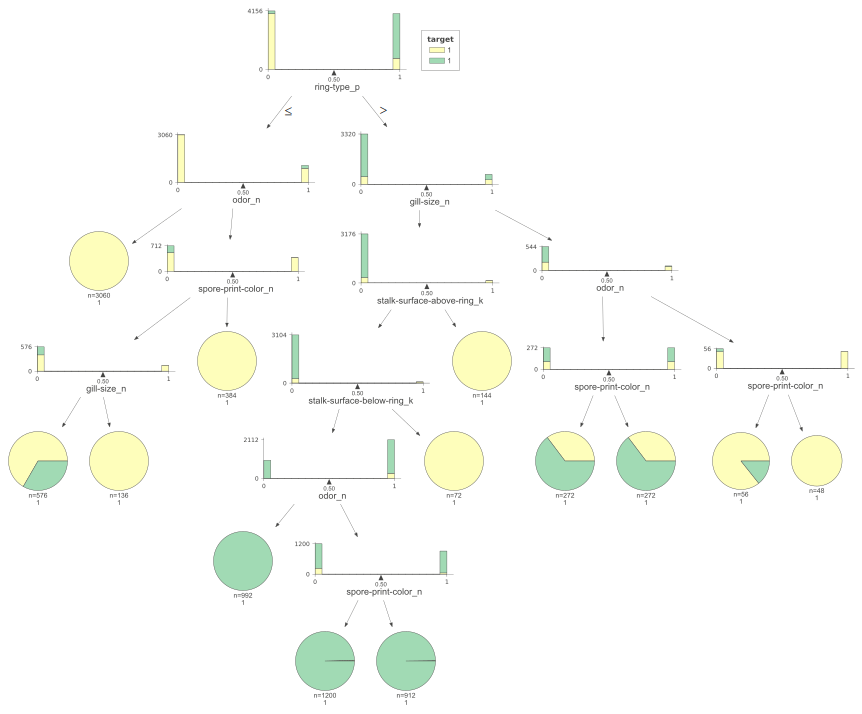